In [50]:
import mrcfile 
import numpy as np
from torchvision.datasets import CocoDetection
import datetime
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import mmcv
def read_tomogram(filename):
    with mrcfile.open(filename, permissive=True) as m:
        return m.data
# mask = read_tomogram("/home/tyfei/datasets/cyroem/test2/ribo_2nd/ribo_2nd_label_masked/TS_027.mrc.mrc")
# mask.shape
# images = read_tomogram("/home/tyfei/datasets/cyroem/test2/ribo_2nd/tomogram/TS_027.mrc_10.30Apx.mrc")
# data = read_tomogram("/data/tyfei/datasets/cyroem/test4/TS_031/ribo/TS_031.mrc.mrc")
data = read_tomogram("/data/tyfei/datasets/cyroem/test4/TS_031.mrc_10.30Apx.mrc")
# data = read_tomogram("/data/tyfei/datasets/cyroem/test4/TS_031/amira/TS_031.mrc_10.30Apx.labels/TS_031.mrc_10.30Apx.labels130/endoplasmic_reticulum_or_Golgi.mrc")
l, h, w = data.shape

In [24]:
import pycocotools
import pycocotools.mask
a = np.array([[0,0,0,1,1,1],[1,1,0,0,0,1],[1,0,0,0,0,1]], dtype=np.uint8)
a = np.asfortranarray(a)
pycocotools.mask.encode(a)

{'size': [3, 6], 'counts': b'121O30N002'}

In [54]:
import imageio
# images = []
for i in range(0, 500, 10):
    # images.append(np.array(data[i]))
    res = np.zeros((3, h, w))
    res[1] = data[i] 
    res[0] = np.mean(data[max(0, i-10):max(i, 1)], axis=0)
    res[2] = np.mean(data[i:i+10], axis=0)
    
    
    np.save("/data/tyfei/datasets/cyroem/test4/Mean10/%s_%i.npy"%("TS_031", i), res)
    # img = mmcv.image.gray2rgb(data[i]/np.mean(data[i])/1.5*255)
    # mmcv.imwrite(img, "/data/tyfei/datasets/cyroem/test4/SingleChannelImage/%s_%i.png"%("TS_031", i))

# imageio.mimsave('./movie.gif', images)

In [46]:
from PIL import Image
t = Image.open("/data/tyfei/datasets/cyroem/test4/SinglechannelImage/TS_031_30.png").convert("RGB")

In [22]:
np.unique(data, return_counts=True)

(array([0, 1], dtype=uint16), array([1463104,   11456]))

In [33]:
data = np.array(data) 
data = np.moveaxis(data, 0, -1)

In [38]:
data = data/np.max(data)

1.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


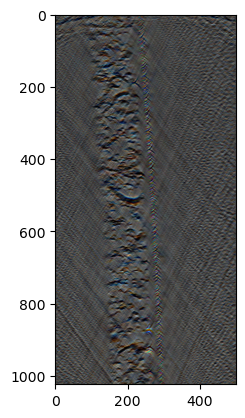

In [42]:
c3 = data[160:163] 
c3 = np.moveaxis(c3, 0, -1)
c3 /= np.max(c3)/1.5
plt.imshow(c3)

In [5]:
names = ["TS_003", "TS_004", "TS_006", "TS_010", "TS_023", "TS_027", "TS_028", "TS_030", "TS_031", "TS_036", "TS_038"]
for name in names:
    print(name)
    data = read_tomogram("/home/tyfei/datasets/cyroem/test2/ribo_2nd/tomogram/%s.mrc_10.30Apx.mrc"%name)
    for i in tqdm(range(10, data.shape[0]-10, 10)):
        newimg = data[i]#.mean(axis=0)
        newimg = newimg/np.mean(newimg)/1.5*255 
        img = mmcv.image.gray2rgb(newimg)
        mmcv.imwrite(img, "/home/tyfei/datasets/cyroem/test2/ribo_2nd/10/%s_%d.jpg"%(name, i))

TS_003


100%|██████████| 48/48 [00:01<00:00, 26.71it/s]


TS_004


100%|██████████| 48/48 [00:01<00:00, 26.70it/s]


TS_006


100%|██████████| 48/48 [00:01<00:00, 27.63it/s]


TS_010


100%|██████████| 48/48 [00:01<00:00, 26.19it/s]


TS_023


100%|██████████| 48/48 [00:01<00:00, 25.83it/s]


TS_027


100%|██████████| 48/48 [00:01<00:00, 26.27it/s]


TS_028


100%|██████████| 48/48 [00:01<00:00, 25.92it/s]


TS_030


100%|██████████| 48/48 [00:01<00:00, 27.38it/s]


TS_031


100%|██████████| 48/48 [00:01<00:00, 25.48it/s]


TS_036


100%|██████████| 48/48 [00:01<00:00, 26.59it/s]


TS_038


100%|██████████| 48/48 [00:01<00:00, 26.95it/s]


(1440, 1024)
424.50644 170.00002 -166.11484


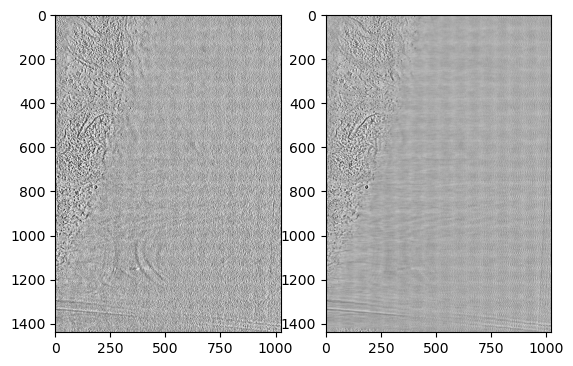

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.imshow(mask[139], cmap="gray")
# data[i]/np.mean(data[i])/1.5*255
# img = images[139]/np.mean(images[139])/1.5*255
# img = mmcv.image.gray2rgb(images[139]/np.mean(images[139])/1.5*255)
i = 120
j = 10

img = mmcv.image.gray2rgb(data[i]/np.mean(data[i])/1.5*255)
mmcv.imwrite(img, "test.png")
img = mmcv.imread("test.png")
ax1.imshow(img, cmap="gray")

newimg = data[i-10:i+10].mean(axis=0)
print(newimg.shape)
newimg = newimg/np.mean(newimg)/1.5*255 
print(np.max(newimg), np.mean(newimg), np.min(newimg))

img = mmcv.image.gray2rgb(newimg)
mmcv.imwrite(img, "test.png")
img = mmcv.imread("test.png")
ax2.imshow(img, cmap="gray")

# plt.imshow(img)

# ax2.imshow(img, cmap="gray")
# img.astype(int)

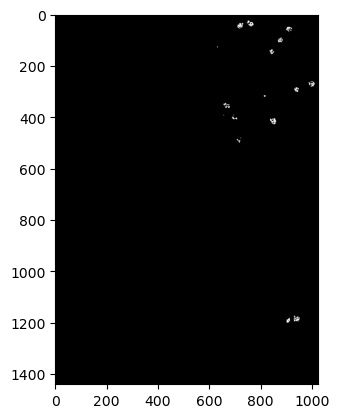

In [6]:
plt.imshow(images[319], cmap="gray")

In [2]:
f = mrcfile.open("/home/tyfei/datasets/cyroem/test2/ribo_2nd/ribo_2nd_label_masked/TS_003.mrc.mrc")

In [10]:
import functools
def cartesian_product_broadcasted(*arrays):
    """
    http://stackoverflow.com/a/11146645/190597 (senderle)
    """
    # print(arrays)
    broadcastable = np.ix_(*arrays)
    broadcasted = np.broadcast_arrays(*broadcastable)
    dtype = np.result_type(*arrays)
    rows, cols = functools.reduce(np.multiply, broadcasted[0].shape), len(broadcasted)
    out = np.empty(rows * cols, dtype=dtype)
    start, end = 0, rows
    for a in broadcasted:
        out[start:end] = a.reshape(-1)
        start, end = end, end + rows
    return out.reshape(cols, rows).T
x, y, z = cartesian_product_broadcasted(*[np.arange(500, dtype='int16'), np.arange(1440, dtype='int16'), np.arange(1024, dtype='int16')]).T

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
volume = images.ravel()
ax.scatter(x, y, z, c=volume, cmap=plt.get_cmap('Greys'), alpha=0.3)

In [1]:
!mkdir "/home/tyfei/datasets/cyroem/test1/test_data_ribo/yolo"

In [11]:
!mkdir "/home/tyfei/datasets/cyroem/test1/test_data_ribo/images"

mkdir: cannot create directory ‘/home/tyfei/datasets/cyroem/test1/test_data_ribo/images’: File exists


In [7]:
import pandas as pd
df_ann = pd.read_csv("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_036_cor_class1_2.txt", sep=" ", header=None)
df_ann = df_ann.drop(len(df_ann)-1, axis=0)
df_ann = df_ann.astype(int)
len(df_ann)

56

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


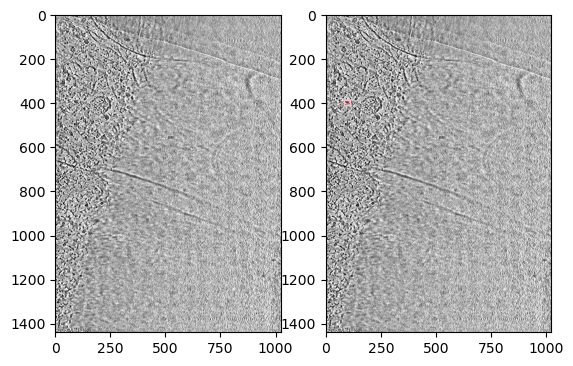

In [56]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img, cmap="gray")
ax2.imshow(img, cmap="gray")
base = 12
ax2.add_patch(Rectangle((96-base, 395-base), base*2, base*2,
             edgecolor = 'pink',
             #facecolor = 'blue',
             fill=False,))
# ax2.scatter([96], [394])

In [46]:
np.max(images[130])*255

17.072470597922802

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


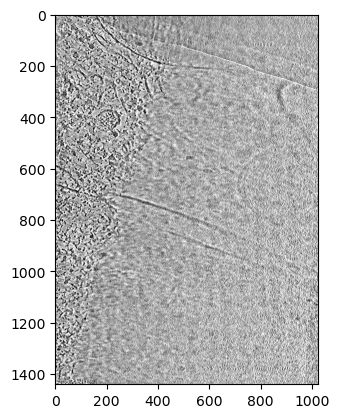

In [84]:
import mmcv 
import matplotlib.pyplot as plt
img = mmcv.image.gray2rgb(data[138]/np.mean(data[138])/1.5*255)
plt.imshow(img)

mmcv.imwrite(img, "test.png")
img = mmcv.imread("test.png")
plt.imshow(img)

In [11]:
valset = [77, 117, 19, 106, 22, 137, 75, 71, 132, 5, 62, 69, 143, 42, 156, 155, 1, 27, 169, 13, 7, 76, 125, 16, 63, 149, 122, 64, 148, 129, 130, 110, 57, 163]

In [31]:
{'id': 1,
  'image_id': 1,
  'category_id': 2,
  'bbox': [219, 238, 31, 22],
  'area': 682,
  'segmentation': [],
  'iscrowd': 0}

{'id': 0,
  'license': 1,
  'file_name': '66_jpg.rf.a400b7f3e1f642d036ec0891c5b0b2b2.jpg',
  'height': 410,
  'width': 280,
  'date_captured': '2023-08-27T15:47:08+00:00'}

imgpath = "/home/tyfei/datasets/cyroem/test1/test_data_ribo/images/"

total_imgs = 0 
total_annotations = 0 
images = [] 
annotations = []

In [32]:
imgtrainpath = "/home/tyfei/datasets/cyroem/test1/test_data_ribo/yolo/images/train"
imgvalpath = "/home/tyfei/datasets/cyroem/test1/test_data_ribo/yolo/images/val"
labeltrainpath = "/home/tyfei/datasets/cyroem/test1/test_data_ribo/yolo/labels/train"
labelvalpath = "/home/tyfei/datasets/cyroem/test1/test_data_ribo/yolo/labels/val"

In [33]:
# mrc : TS_030.mrc_10.30Apx.mrc
img_label = "TS_030"
last = -5
THRES1 = 2
THRES2 = 5
BOX = 12

data = read_tomogram("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_030.mrc_10.30Apx.mrc")
# images.shape (500, 1440, 1024)
d, h, w = data.shape
print(data.shape)

df_ann = pd.read_csv("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_030_cor_class1_2.txt", sep=" ", header=None)
df_ann = df_ann.drop(len(df_ann)-1, axis=0)
df_ann = df_ann.astype(int)

for i in tqdm(np.sort(df_ann[2])):
    if i - last < THRES1:
        continue
    last = i
    img_name = f"%s_%i.jpeg"%(img_label, total_imgs) 
    img_info = {
        "id": total_imgs + 1, 
        "license":1, 
        "file_name":img_name, 
        "height":h, 
        "width":w, 
        "date_captured":str(datetime.datetime.now())
    }
    img = mmcv.image.gray2rgb(data[i]/np.mean(data[i])/1.5*255)
    if total_imgs in valset:
        mmcv.imwrite(img, os.path.join(imgvalpath, img_name))    
        f = open(os.path.join(labelvalpath, f"%s_%i.txt"%(img_label, total_imgs)), "w")
    else:
        mmcv.imwrite(img, os.path.join(imgtrainpath, img_name))    
        f = open(os.path.join(labeltrainpath, f"%s_%i.txt"%(img_label, total_imgs)), "w")

    images.append(img_info)
    total_imgs += 1
    df_ann["dist"] = df_ann[2].apply(lambda x: np.abs(x-i))
    need = df_ann[df_ann["dist"] < THRES2]
    

    for j, r in need.iterrows():
        total_annotations += 1 
        annotation_info = {'id': total_annotations,
        'image_id': img_info["id"],
        'category_id': 1,
        'bbox': [r[0]-BOX, r[1]-BOX, 2*BOX, 2*BOX],
        'area': BOX*BOX*4,
        'segmentation': [],
        'iscrowd': 0}
        f.write("0\t%f\t%f\t%f\t%f\n"%(r[0]/w, r[1]/h, 2*BOX/w, 2*BOX/h))
        # print("0\t%f\t%f\t%f\t%f\n"%(r[0]/w, r[1]/h, 2*BOX/w, 2*BOX/h))
        annotations.append(annotation_info)
    f.close()
        

    

  7%|▋         | 6/83 [00:00<00:03, 24.87it/s]

0	0.190430	0.382639	0.023438	0.016667

0	0.093750	0.273611	0.023438	0.016667

0	0.109375	0.364583	0.023438	0.016667

0	0.160156	0.353472	0.023438	0.016667

0	0.362305	0.170833	0.023438	0.016667

0	0.388672	0.163194	0.023438	0.016667

0	0.158203	0.406250	0.023438	0.016667

0	0.362305	0.170833	0.023438	0.016667

0	0.388672	0.163194	0.023438	0.016667

0	0.210938	0.322222	0.023438	0.016667

0	0.158203	0.406250	0.023438	0.016667

0	0.138672	0.365278	0.023438	0.016667

0	0.236328	0.315278	0.023438	0.016667



 18%|█▊        | 15/83 [00:00<00:01, 35.00it/s]

0	0.362305	0.170833	0.023438	0.016667

0	0.210938	0.322222	0.023438	0.016667

0	0.158203	0.406250	0.023438	0.016667

0	0.138672	0.365278	0.023438	0.016667

0	0.236328	0.315278	0.023438	0.016667

0	0.362305	0.170833	0.023438	0.016667

0	0.210938	0.322222	0.023438	0.016667

0	0.158203	0.406250	0.023438	0.016667

0	0.138672	0.365278	0.023438	0.016667

0	0.236328	0.315278	0.023438	0.016667

0	0.260742	0.444444	0.023438	0.016667

0	0.437500	0.261111	0.023438	0.016667

0	0.260742	0.444444	0.023438	0.016667

0	0.437500	0.261111	0.023438	0.016667

0	0.274414	0.404861	0.023438	0.016667

0	0.399414	0.448611	0.023438	0.016667

0	0.516602	0.327778	0.023438	0.016667

0	0.274414	0.404861	0.023438	0.016667

0	0.399414	0.448611	0.023438	0.016667

0	0.516602	0.327778	0.023438	0.016667

0	0.324219	0.529861	0.023438	0.016667



 28%|██▊       | 23/83 [00:00<00:01, 34.66it/s]

0	0.621094	0.194444	0.023438	0.016667

0	0.399414	0.448611	0.023438	0.016667

0	0.516602	0.327778	0.023438	0.016667

0	0.324219	0.529861	0.023438	0.016667

0	0.579102	0.396528	0.023438	0.016667

0	0.621094	0.194444	0.023438	0.016667

0	0.324219	0.529861	0.023438	0.016667

0	0.394531	0.550694	0.023438	0.016667

0	0.249023	0.500000	0.023438	0.016667

0	0.579102	0.396528	0.023438	0.016667

0	0.621094	0.194444	0.023438	0.016667

0	0.324219	0.529861	0.023438	0.016667

0	0.394531	0.550694	0.023438	0.016667

0	0.249023	0.500000	0.023438	0.016667

0	0.579102	0.396528	0.023438	0.016667

0	0.621094	0.194444	0.023438	0.016667

0	0.364258	0.543750	0.023438	0.016667

0	0.394531	0.550694	0.023438	0.016667

0	0.249023	0.500000	0.023438	0.016667

0	0.579102	0.396528	0.023438	0.016667

0	0.634766	0.178472	0.023438	0.016667

0	0.400391	0.468750	0.023438	0.016667

0	0.364258	0.543750	0.023438	0.016667

0	0.394531	0.550694	0.023438	0.016667

0	0.249023	0.500000	0.023438	0.016667

0	0.398438	0.498611	0.023

 46%|████▌     | 38/83 [00:00<00:00, 50.67it/s]

0	0.634766	0.178472	0.023438	0.016667

0	0.514648	0.277778	0.023438	0.016667

0	0.400391	0.468750	0.023438	0.016667

0	0.398438	0.498611	0.023438	0.016667

0	0.428711	0.494444	0.023438	0.016667

0	0.399414	0.519444	0.023438	0.016667

0	0.649414	0.395833	0.023438	0.016667

0	0.534180	0.471528	0.023438	0.016667

0	0.598633	0.393056	0.023438	0.016667

0	0.399414	0.519444	0.023438	0.016667

0	0.649414	0.395833	0.023438	0.016667

0	0.500977	0.475000	0.023438	0.016667

0	0.450195	0.444444	0.023438	0.016667

0	0.592773	0.534722	0.023438	0.016667

0	0.534180	0.471528	0.023438	0.016667

0	0.598633	0.393056	0.023438	0.016667

0	0.580078	0.354861	0.023438	0.016667

0	0.552734	0.388194	0.023438	0.016667

0	0.449219	0.463889	0.023438	0.016667

0	0.649414	0.395833	0.023438	0.016667

0	0.500977	0.475000	0.023438	0.016667

0	0.531250	0.266667	0.023438	0.016667

0	0.450195	0.444444	0.023438	0.016667

0	0.592773	0.534722	0.023438	0.016667

0	0.598633	0.393056	0.023438	0.016667

0	0.580078	0.354861	0.023

 55%|█████▌    | 46/83 [00:01<00:00, 57.62it/s]

0	0.552734	0.388194	0.023438	0.016667

0	0.626953	0.293056	0.023438	0.016667

0	0.562500	0.278472	0.023438	0.016667

0	0.712891	0.152778	0.023438	0.016667

0	0.640625	0.359028	0.023438	0.016667

0	0.423828	0.488194	0.023438	0.016667

0	0.497070	0.540972	0.023438	0.016667

0	0.535156	0.543750	0.023438	0.016667

0	0.638672	0.415278	0.023438	0.016667

0	0.626953	0.293056	0.023438	0.016667

0	0.562500	0.278472	0.023438	0.016667

0	0.712891	0.152778	0.023438	0.016667

0	0.640625	0.359028	0.023438	0.016667

0	0.519531	0.579861	0.023438	0.016667

0	0.685547	0.380556	0.023438	0.016667

0	0.423828	0.488194	0.023438	0.016667

0	0.497070	0.540972	0.023438	0.016667

0	0.562500	0.278472	0.023438	0.016667

0	0.712891	0.152778	0.023438	0.016667

0	0.640625	0.359028	0.023438	0.016667

0	0.616211	0.587500	0.023438	0.016667

0	0.688477	0.522917	0.023438	0.016667

0	0.519531	0.579861	0.023438	0.016667

0	0.685547	0.380556	0.023438	0.016667

0	0.423828	0.488194	0.023438	0.016667

0	0.616211	0.587500	0.023

 63%|██████▎   | 52/83 [00:01<00:00, 53.54it/s]

0	0.685547	0.139583	0.023438	0.016667

0	0.570312	0.401389	0.023438	0.016667

0	0.525391	0.496528	0.023438	0.016667

0	0.766602	0.447917	0.023438	0.016667

0	0.666016	0.400000	0.023438	0.016667

0	0.637695	0.536111	0.023438	0.016667

0	0.766602	0.447917	0.023438	0.016667

0	0.666016	0.400000	0.023438	0.016667

0	0.637695	0.536111	0.023438	0.016667

0	0.752930	0.467361	0.023438	0.016667

0	0.706055	0.575694	0.023438	0.016667

0	0.666016	0.400000	0.023438	0.016667

0	0.752930	0.467361	0.023438	0.016667

0	0.706055	0.575694	0.023438	0.016667

0	0.607422	0.580556	0.023438	0.016667

0	0.632812	0.588889	0.023438	0.016667

0	0.895508	0.352778	0.023438	0.016667

0	0.752930	0.467361	0.023438	0.016667



 76%|███████▌  | 63/83 [00:01<00:00, 41.61it/s]

0	0.706055	0.575694	0.023438	0.016667

0	0.607422	0.580556	0.023438	0.016667

0	0.632812	0.588889	0.023438	0.016667

0	0.619141	0.556944	0.023438	0.016667

0	0.895508	0.352778	0.023438	0.016667

0	0.706055	0.575694	0.023438	0.016667

0	0.607422	0.580556	0.023438	0.016667

0	0.632812	0.588889	0.023438	0.016667

0	0.619141	0.556944	0.023438	0.016667

0	0.895508	0.352778	0.023438	0.016667

0	0.607422	0.580556	0.023438	0.016667

0	0.632812	0.588889	0.023438	0.016667

0	0.619141	0.556944	0.023438	0.016667

0	0.895508	0.352778	0.023438	0.016667

0	0.671875	0.609722	0.023438	0.016667

0	0.818359	0.481250	0.023438	0.016667

0	0.619141	0.556944	0.023438	0.016667

0	0.671875	0.609722	0.023438	0.016667

0	0.807617	0.275000	0.023438	0.016667

0	0.818359	0.481250	0.023438	0.016667

0	0.782227	0.682639	0.023438	0.016667

0	0.671875	0.609722	0.023438	0.016667

0	0.807617	0.275000	0.023438	0.016667

0	0.818359	0.481250	0.023438	0.016667



 90%|█████████ | 75/83 [00:01<00:00, 41.09it/s]

0	0.649414	0.604167	0.023438	0.016667

0	0.718750	0.618056	0.023438	0.016667

0	0.739258	0.497917	0.023438	0.016667

0	0.664062	0.582639	0.023438	0.016667

0	0.882812	0.337500	0.023438	0.016667

0	0.649414	0.604167	0.023438	0.016667

0	0.718750	0.618056	0.023438	0.016667

0	0.739258	0.497917	0.023438	0.016667

0	0.664062	0.582639	0.023438	0.016667

0	0.882812	0.337500	0.023438	0.016667

0	0.839844	0.601389	0.023438	0.016667

0	0.831055	0.659028	0.023438	0.016667

0	0.839844	0.601389	0.023438	0.016667

0	0.831055	0.659028	0.023438	0.016667

0	0.730469	0.634028	0.023438	0.016667

0	0.738281	0.581250	0.023438	0.016667

0	0.843750	0.294444	0.023438	0.016667

0	0.839844	0.601389	0.023438	0.016667

0	0.889648	0.277778	0.023438	0.016667

0	0.730469	0.634028	0.023438	0.016667

0	0.738281	0.581250	0.023438	0.016667

0	0.843750	0.294444	0.023438	0.016667

0	0.839844	0.601389	0.023438	0.016667

0	0.889648	0.277778	0.023438	0.016667

0	0.730469	0.634028	0.023438	0.016667

0	0.737305	0.670139	0.023

100%|██████████| 83/83 [00:02<00:00, 40.80it/s]

0	0.889648	0.277778	0.023438	0.016667

0	0.867188	0.461806	0.023438	0.016667

0	0.963867	0.159722	0.023438	0.016667

0	0.737305	0.670139	0.023438	0.016667

0	0.946289	0.260417	0.023438	0.016667

0	0.738281	0.581250	0.023438	0.016667

0	0.843750	0.294444	0.023438	0.016667

0	0.889648	0.277778	0.023438	0.016667

0	0.867188	0.461806	0.023438	0.016667

0	0.963867	0.159722	0.023438	0.016667

0	0.737305	0.670139	0.023438	0.016667

0	0.946289	0.260417	0.023438	0.016667

0	0.936523	0.276389	0.023438	0.016667

0	0.867188	0.461806	0.023438	0.016667

0	0.963867	0.159722	0.023438	0.016667

0	0.737305	0.670139	0.023438	0.016667

0	0.946289	0.260417	0.023438	0.016667

0	0.936523	0.276389	0.023438	0.016667

0	0.963867	0.159722	0.023438	0.016667

0	0.946289	0.260417	0.023438	0.016667

0	0.943359	0.511111	0.023438	0.016667

0	0.929688	0.757639	0.023438	0.016667



In [15]:
# mrc : TS_030.mrc_10.30Apx.mrc
img_label = "TS_031"
last = -5
THRES1 = 2
THRES2 = 5
BOX = 12

data = read_tomogram("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_031.mrc_10.30Apx.mrc")
# images.shape (500, 1440, 1024)
d, h, w = data.shape

df_ann = pd.read_csv("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_031_cor_class1_2.txt", sep=" ", header=None)
df_ann = df_ann.drop(len(df_ann)-1, axis=0)
df_ann = df_ann.astype(int)

for i in tqdm(np.sort(df_ann[2])):
    if i - last < THRES1:
        continue
    last = i
    img_name = f"%s_%i.jpeg"%(img_label, total_imgs) 
    img_info = {
        "id": total_imgs + 1, 
        "license":1, 
        "file_name":img_name, 
        "height":h, 
        "width":w, 
        "date_captured":str(datetime.datetime.now())
    }
    img = mmcv.image.gray2rgb(data[i]/np.mean(data[i])/1.5*255)
    if total_imgs in valset:
        mmcv.imwrite(img, os.path.join(imgvalpath, img_name))    
        f = open(os.path.join(labelvalpath, f"%s_%i.txt"), "w")
    else:
        mmcv.imwrite(img, os.path.join(imgtrainpath, img_name))    
        f = open(os.path.join(labeltrainpath, f"%s_%i.txt"), "w")

    images.append(img_info)
    total_imgs += 1
    df_ann["dist"] = df_ann[2].apply(lambda x: np.abs(x-i))
    need = df_ann[df_ann["dist"] < THRES2]
    

    for j, r in need.iterrows():
        total_annotations += 1 
        annotation_info = {'id': total_annotations,
        'image_id': img_info["id"],
        'category_id': 1,
        'bbox': [r[0]-BOX, r[1]-BOX, 2*BOX, 2*BOX],
        'area': BOX*BOX*4,
        'segmentation': [],
        'iscrowd': 0}
        f.write("0\t%f\t%f\t%f\t%f\n"%(r[0]/h, r[1]/w, 2*BOX/h, 2*BOX/w))
        annotations.append(annotation_info)
    f.close()
        

    

  0%|          | 0/260 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/home/tyfei/datasets/cyroem/test1/test_data_ribo/yolo/labels/train/%s_%i.txt'

In [3]:
"%f %f %f"%(2.0, 2.3, 2.4)

'2.000000 2.300000 2.400000'

In [8]:
# mrc : TS_030.mrc_10.30Apx.mrc
img_label = "TS_031"
last = -5
THRES1 = 2
THRES2 = 5
BOX = 12

data = read_tomogram("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_031.mrc_10.30Apx.mrc")
# images.shape (500, 1440, 1024)
d, h, w = data.shape

df_ann = pd.read_csv("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_031_cor_class1_2.txt", sep=" ", header=None)
df_ann = df_ann.drop(len(df_ann)-1, axis=0)
df_ann = df_ann.astype(int)

for i in tqdm(np.sort(df_ann[2])):
    if i - last < THRES1:
        continue
    last = i
    img_name = f"%s_%i.jpeg"%(img_label, total_imgs) 
    img_info = {
        "id": total_imgs + 1, 
        "license":1, 
        "file_name":img_name, 
        "height":h, 
        "width":w, 
        "date_captured":str(datetime.datetime.now())
    }
    img = mmcv.image.gray2rgb(data[i]/np.mean(data[i])/1.5*255)
    mmcv.imwrite(img, os.path.join(imgpath, img_name))    

    images.append(img_info)
    total_imgs += 1
    df_ann["dist"] = df_ann[2].apply(lambda x: np.abs(x-i))
    need = df_ann[df_ann["dist"] < THRES2]
    

    for j, r in need.iterrows():
        total_annotations += 1 
        annotation_info = {'id': total_annotations,
        'image_id': img_info["id"],
        'category_id': 1,
        'bbox': [r[0]-BOX, r[1]-BOX, 2*BOX, 2*BOX],
        'area': BOX*BOX*4,
        'segmentation': [],
        'iscrowd': 0}
        annotations.append(annotation_info)

100%|██████████| 260/260 [00:03<00:00, 85.57it/s] 


In [9]:
# mrc : TS_030.mrc_10.30Apx.mrc
img_label = "TS_036"
last = -5
THRES1 = 2
THRES2 = 5
BOX = 12

data = read_tomogram("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_036.mrc_10.30Apx.mrc")
# images.shape (500, 1440, 1024)
d, h, w = data.shape

df_ann = pd.read_csv("/home/tyfei/datasets/cyroem/test1/test_data_ribo/TS_036_cor_class1_2.txt", sep=" ", header=None)
df_ann = df_ann.drop(len(df_ann)-1, axis=0)
df_ann = df_ann.astype(int)

for i in tqdm(np.sort(df_ann[2])):
    if i - last < THRES1:
        continue
    last = i
    img_name = f"%s_%i.jpeg"%(img_label, total_imgs) 
    img_info = {
        "id": total_imgs + 1, 
        "license":1, 
        "file_name":img_name, 
        "height":h, 
        "width":w, 
        "date_captured":str(datetime.datetime.now())
    }
    img = mmcv.image.gray2rgb(data[i]/np.mean(data[i])/1.5*255)
    mmcv.imwrite(img, os.path.join(imgpath, img_name))    

    images.append(img_info)
    total_imgs += 1
    df_ann["dist"] = df_ann[2].apply(lambda x: np.abs(x-i))
    need = df_ann[df_ann["dist"] < THRES2]
    

    for j, r in need.iterrows():
        total_annotations += 1 
        annotation_info = {'id': total_annotations,
        'image_id': img_info["id"],
        'category_id': 1,
        'bbox': [r[0]-BOX, r[1]-BOX, 2*BOX, 2*BOX],
        'area': BOX*BOX*4,
        'segmentation': [],
        'iscrowd': 0}
        annotations.append(annotation_info)

100%|██████████| 56/56 [00:01<00:00, 44.56it/s]


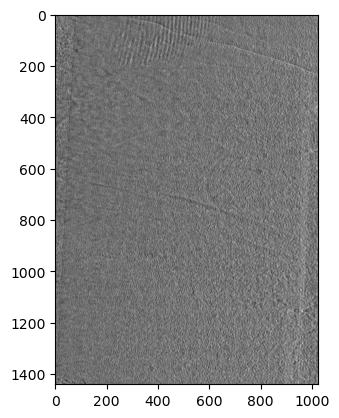

In [11]:
plt.imshow(data[50], cmap="grey")

In [4]:
# from mmdet.apis import init_detector, inference_detector
# import mmcv
# config_file = 'mask-rcnn_r50_fpn_r16_gcb_c3-c5_1x_coco.py'
# checkpoint_file = 'mask_rcnn_r50_fpn_r16_gcb_c3-c5_1x_coco_20200515_211915-187da160.pth'
# model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
# image = mmcv.imread('demo.jpg')
# result = inference_detector(model, image)

Loads checkpoint by local backend from path: mask_rcnn_r50_fpn_r16_gcb_c3-c5_1x_coco_20200515_211915-187da160.pth


/home/tyfei/anaconda3/envs/pytorch/lib/python3.12/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


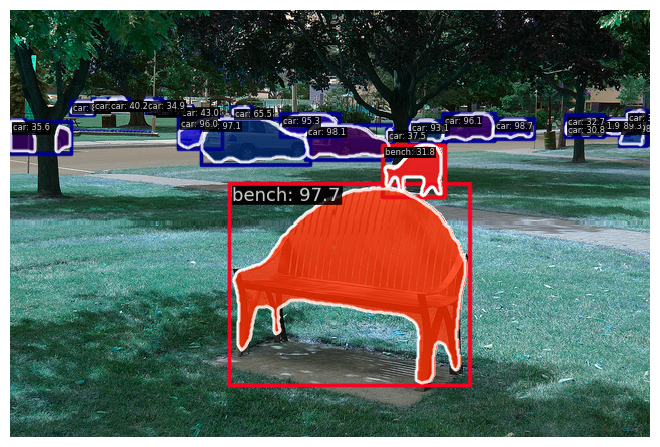

In [5]:
# from mmdet.registry import VISUALIZERS
# visualizer = VISUALIZERS.build(model.cfg.visualizer)
# visualizer.dataset_meta = model.dataset_meta

# # show the results
# visualizer.add_datasample(
#     'result',
#     image,
#     data_sample=result,
#     draw_gt=False,
#     wait_time=0,
#     # out_file='outputs/result.png' # optionally, write to output file
# )
# visualizer.show()

In [6]:
result

<DetDataSample(

    META INFORMATION
    img_id: 0
    ori_shape: (427, 640)
    img_path: None
    pad_shape: (800, 1216)
    scale_factor: (1.8734375, 1.873536299765808)
    batch_input_shape: (800, 1216)
    img_shape: (800, 1199)

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            masks: BitmapMasks(num_masks=0, height=427, width=640)
            labels: tensor([], dtype=torch.int64)
        ) at 0x7fa46bbacb00>
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            masks: BitmapMasks(num_masks=0, height=427, width=640)
            labels: tensor([], dtype=torch.int64)
        ) at 0x7fa46bbae030>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[4.8154e+02, 1.1045e+

In [22]:
import json 
with open("./_annotations.coco.json", "r") as f:
    data = json.load(f)
data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [26]:
data["annotations"]

[{'id': 0,
  'image_id': 0,
  'category_id': 2,
  'bbox': [166, 167, 34, 36],
  'area': 1224,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 1,
  'category_id': 2,
  'bbox': [219, 238, 31, 22],
  'area': 682,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 2,
  'category_id': 2,
  'bbox': [241, 271, 21, 12],
  'area': 252,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 3,
  'image_id': 3,
  'category_id': 2,
  'bbox': [125, 111, 77, 108],
  'area': 8316,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 4,
  'image_id': 4,
  'category_id': 2,
  'bbox': [128, 78, 26, 26],
  'area': 676,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 5,
  'image_id': 4,
  'category_id': 2,
  'bbox': [37, 104, 20, 22],
  'area': 440,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 6,
  'image_id': 4,
  'category_id': 2,
  'bbox': [188, 180, 33, 27],
  'area': 891,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 7,
  'image_id': 4,
  'category_id': 2,
  'bbox': [80, 91, 20, 14],

In [10]:
categories = [
    {"id": 1, "name": "memb"},
    {"id": 2, "name": "nucleus_memb"},
    {"id": 3, "name": "ribo"},
    {"id": 4, "name": "microtubule"},
    {"id": 5, "name": "actin"},
    {"id": 6, "name": "intermediate_filament"},
    {"id": 7, "name": "nucleus"},
    {"id": 8, "name": "nuclear_pore"},
    {"id": 9, "name": "dense_region_within_the_nucleus"},
    {"id": 10, "name": "Monolamellar_membrane_vesicle_without_contents"},
    {"id": 11, "name": "Monolamellar_membrane_vesicle_with_contents"},
    {"id": 12, "name": "endoplasmic_reticulum_or_Golgi"},
    {"id": 13, "name": "multilayer_membrane_vesicle"},
    {"id": 14, "name": "mitochondria"},
]
info = {
    "name": "TS_031 test dataset",
    "date": str(datetime.datetime.now()),
    "contributor": "Tianyi Fei",
}
licenses = [{"id": 1, "hahaha": 0}]

In [11]:
ann = {
    "info":info,
    "licenses":licenses,
    "images":images, 
    "annotations":annotations,
    "categories":categories
}

In [12]:
import json
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
with open("/home/tyfei/datasets/cyroem/test1/test_data_ribo/test_annotations.json", "w") as f:
    json.dump(ann, f, cls=NpEncoder)

In [2]:
import supervision as sv 

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"/home/tyfei/datasets/cyroem/test1/test_data_ribo/images",
    annotations_path=f"/home/tyfei/datasets/cyroem/test1/test_data_ribo/test_annotations.json",
)

# images = list(ds.images.values())
# ds = CocoDetection("/home/tyfei/datasets/cyroem/test1/test_data_ribo/images", "/home/tyfei/datasets/cyroem/test1/test_data_ribo/test_annotations.json")
# ds.annotations

Image /home/tyfei/datasets/cyroem/test1/test_data_ribo/images/TS_036_162.jpeg


SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


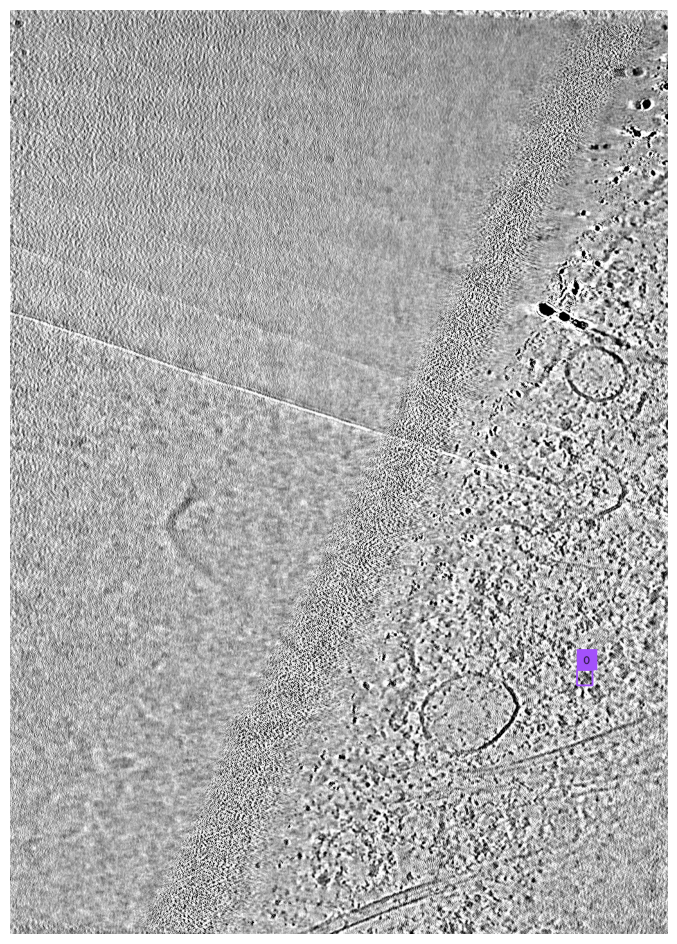

In [4]:
import random
# import cv2
import numpy as np


# select random image
image_ids = list(ds.images.keys())
image_id = random.choice(image_ids)
print('Image {}'.format(image_id))

# load image and annotatons 
image = ds.images[image_id]
detections = ds.annotations[image_id]
# image_path = os.path.join(ds.root, image['file_name'])
# image = mmcv.imread(image_path)

# annotate
# sv.Detections.from_coco_annotations(coco_annotation=annotations)
# we will use id2label function for training
# categories = ds.coco.cats
# id2label = {k: v['name'] for k,v in categories.items()}

# labels = [
#     f"{id2label[class_id]}" 
#     for _, _, class_id, _ 
#     in detections
# ]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections)
sv.plot_image(frame)

In [56]:
from pycocotools.coco import COCO
coco=COCO("/data/tyfei/datasets/cyroem/test1/test_data_ribo/test_annotations.json")

imgId = 42  # an arbitrary image id
file_name = coco.loadImgs(imgId)[0]["file_name"]

img = plt.imread(file_name)
plt.imshow(img)
plt.axis("off")

annIds = coco.getAnnIds(imgIds=imgId, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


FileNotFoundError: [Errno 2] No such file or directory: '/home/tyfei/cyroem/TS_030_41.jpeg'

In [75]:
annotations

[{'id': 155,
  'image_id': 32,
  'category_id': 1,
  'bbox': [773, 633, 24, 24],
  'area': 576,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 156,
  'image_id': 32,
  'category_id': 1,
  'bbox': [670, 564, 24, 24],
  'area': 576,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 157,
  'image_id': 32,
  'category_id': 1,
  'bbox': [641, 760, 24, 24],
  'area': 576,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 158,
  'image_id': 32,
  'category_id': 1,
  'bbox': [759, 661, 24, 24],
  'area': 576,
  'segmentation': [],
  'iscrowd': 0}]

In [ ]:
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

In [ ]:
image = random.choice(images)
result = inference_detector(model, image)
detections = sv.Detections.from_mmdetection(result)
detections = detections[detections.confidence > 0.4].with_nms()

box_annotator = sv.BoxAnnotator()
labels = [
    f"{ds.classes[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections
]
annotated_image = box_annotator.annotate(image.copy(), detections, labels=labels)
sv.plot_image(image=annotated_image, size=(10, 10))

In [ ]:
ds = CocoDetection("/home/tyfei/datasets/cyroem/test1/test_data_ribo/images", "/home/tyfei/datasets/cyroem/test1/test_data_ribo/test_annotations.json")

In [ ]:
train_set, val_set = torch.utils.data.random_split(dataset, [50000, 10000])